<a href="https://colab.research.google.com/github/ksivaram2/Traffic-Sign-recognization/blob/main/TRAFFICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME']='sivaram09'
os.environ['KAGGLE_KEY']='53b813b56cf801c3e5f0eb216da20039'

In [2]:
!kaggle datasets download flo2607/traffic-signs-classification

Dataset URL: https://www.kaggle.com/datasets/flo2607/traffic-signs-classification
License(s): CC0-1.0
 96% 63.0M/65.5M [00:05<00:00, 17.8MB/s]
100% 65.5M/65.5M [00:05<00:00, 13.2MB/s]


In [3]:
!unzip /content/traffic-signs-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: myData/8/00015_00010.jpg  
  inflating: myData/8/00015_00011.jpg  
  inflating: myData/8/00015_00012.jpg  
  inflating: myData/8/00015_00013.jpg  
  inflating: myData/8/00015_00014.jpg  
  inflating: myData/8/00015_00015.jpg  
  inflating: myData/8/00015_00016.jpg  
  inflating: myData/8/00015_00017.jpg  
  inflating: myData/8/00015_00018.jpg  
  inflating: myData/8/00015_00019.jpg  
  inflating: myData/8/00015_00020.jpg  
  inflating: myData/8/00015_00021.jpg  
  inflating: myData/8/00015_00022.jpg  
  inflating: myData/8/00015_00023.jpg  
  inflating: myData/8/00015_00024.jpg  
  inflating: myData/8/00015_00025.jpg  
  inflating: myData/8/00015_00026.jpg  
  inflating: myData/8/00015_00027.jpg  
  inflating: myData/8/00015_00028.jpg  
  inflating: myData/8/00015_00029.jpg  
  inflating: myData/8/00016_00000.jpg  
  inflating: myData/8/00016_00001.jpg  
  inflating: myData/8/00016_00002.jpg  
  inflating: myData/8/00016_0

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from PIL import Image
cur_path = os.getcwd()
classes=42
data=[]
label=[]
for i in range(classes):
    path = os.path.join(cur_path,'myData',str(i))
    images = os.listdir(path)
    for a in images:
        image = Image.open(path + '/'+ a)
        image = np.array(image)
        data.append(image)
        label.append(i)

In [6]:
data = np.array(data)
label = np.array(label)

In [8]:
np.save('./training/data',data)
np.save('./training/target',label)

In [9]:
data=np.load('./training/data.npy')
label=np.load('./training/target.npy')

In [10]:
print(data.shape, label.shape)

(72689, 32, 32, 3) (72689,)


In [11]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(58151, 32, 32, 3) (14538, 32, 32, 3) (58151,) (14538,)


In [14]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
1818/1818 [==============================] - 280s 153ms/step - loss: 1.4396 - accuracy: 0.6312 - val_loss: 0.2677 - val_accuracy: 0.9184
Epoch 2/5
1818/1818 [==============================] - 282s 155ms/step - loss: 0.4807 - accuracy: 0.8551 - val_loss: 0.1440 - val_accuracy: 0.9591
Epoch 3/5
1818/1818 [==============================] - 278s 153ms/step - loss: 0.3328 - accuracy: 0.9005 - val_loss: 0.0998 - val_accuracy: 0.9708
Epoch 4/5
1818/1818 [==============================] - 277s 153ms/step - loss: 0.2735 - accuracy: 0.9182 - val_loss: 0.0875 - val_accuracy: 0.9739
Epoch 5/5
1818/1818 [==============================] - 278s 153ms/step - loss: 0.2460 - accuracy: 0.9280 - val_loss: 0.0803 - val_accuracy: 0.9752


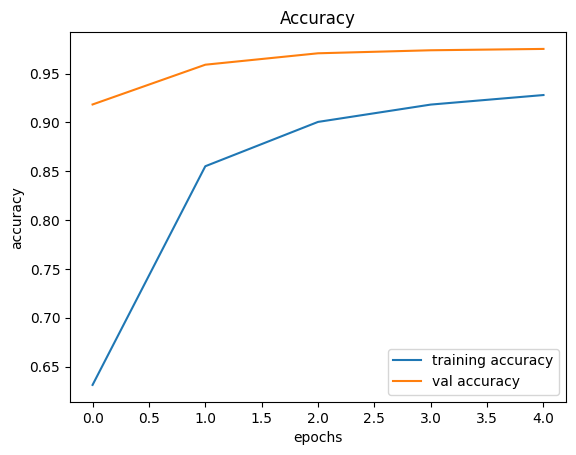

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

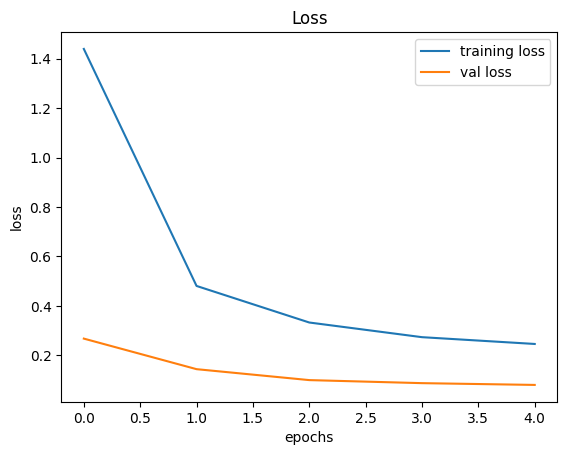

In [19]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 609M/612M [00:24<00:00, 27.9MB/s]
100% 612M/612M [00:24<00:00, 26.0MB/s]


In [21]:
!unzip /content/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [22]:
import pandas as pd

In [23]:
y_test = pd.read_csv('/content/Test.csv')
label = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))
X_test=np.array(data)

In [24]:
y_pred_probs = model.predict(X_test)
Y_pred = np.argmax(y_pred_probs, axis=1)

395/395 [==============================] - 18s 44ms/step


In [25]:
Y_pred

array([16,  1, 38, ...,  3,  7, 10])

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9226444972288202


In [27]:
model.save("./training/TSR.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))
    X_test=np.array(data)
    y_pred_probs = model.predict(X_test)
    Y_pred = np.argmax(y_pred_probs, axis=1)
    return image,Y_pred

In [30]:
plot,prediction = test_on_img('/content/Test/00005.png')

1/1 [==============================] - 0s 101ms/step


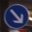

In [31]:
plot

In [32]:
prediction

array([38])

In [33]:
s = [str(i) for i in prediction]
a = int("".join(s))

In [34]:
print(a)

38


In [35]:
y_test = pd.read_csv('/content/labels.csv')
label = y_test["ClassId"].values
imgs = y_test["Name"].values

In [36]:
label

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [37]:
imgs

array(['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vechiles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep le

Predicted traffic sign is:  Keep right


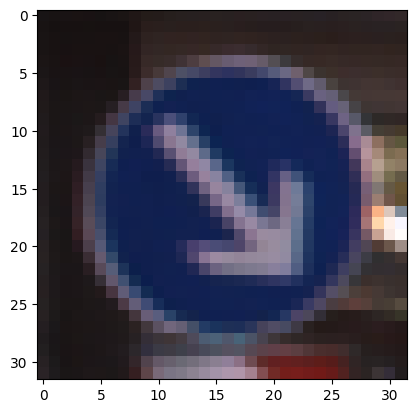

In [38]:
print("Predicted traffic sign is: ", imgs[a])
plt.imshow(plot)
plt.show()

In [39]:
plot,prediction = test_on_img('/content/Test/00013.png')

1/1 [==============================] - 0s 21ms/step


In [40]:
s = [str(i) for i in prediction]
a = int("".join(s))

Predicted traffic sign is:  Speed limit (100km/h)


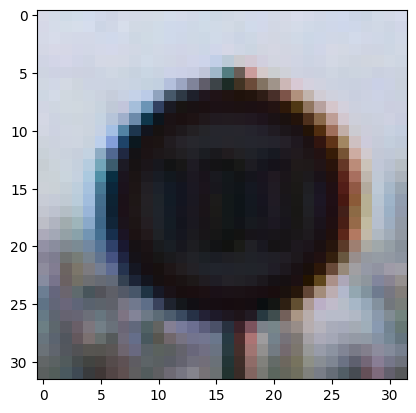

In [41]:
print("Predicted traffic sign is: ", imgs[a])
plt.imshow(plot)
plt.show()